# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

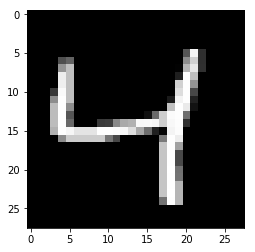

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6961
Epoch: 1/20... Training loss: 0.6924
Epoch: 1/20... Training loss: 0.6889
Epoch: 1/20... Training loss: 0.6852
Epoch: 1/20... Training loss: 0.6810
Epoch: 1/20... Training loss: 0.6760
Epoch: 1/20... Training loss: 0.6700
Epoch: 1/20... Training loss: 0.6619
Epoch: 1/20... Training loss: 0.6536
Epoch: 1/20... Training loss: 0.6432
Epoch: 1/20... Training loss: 0.6332
Epoch: 1/20... Training loss: 0.6196
Epoch: 1/20... Training loss: 0.6048
Epoch: 1/20... Training loss: 0.5901
Epoch: 1/20... Training loss: 0.5744
Epoch: 1/20... Training loss: 0.5572
Epoch: 1/20... Training loss: 0.5431
Epoch: 1/20... Training loss: 0.5227
Epoch: 1/20... Training loss: 0.5018
Epoch: 1/20... Training loss: 0.4830
Epoch: 1/20... Training loss: 0.4710
Epoch: 1/20... Training loss: 0.4495
Epoch: 1/20... Training loss: 0.4349
Epoch: 1/20... Training loss: 0.4221
Epoch: 1/20... Training loss: 0.4061
Epoch: 1/20... Training loss: 0.3860
Epoch: 1/20... Training loss: 0.3750
E

Epoch: 1/20... Training loss: 0.1968
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1977
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1922
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1834
E

Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1617
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1474
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1601
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1555
E

Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1423
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1385
E

Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1236
E

Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1222
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1118
E

Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1042
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1131
E

Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.0988
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1026
E

Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0952
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1014
E

Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0972
E

Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0973
E

Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0911
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0941
E

Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0903
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0897
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0878
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0877
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0888
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.1003
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0884
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0882
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0879
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

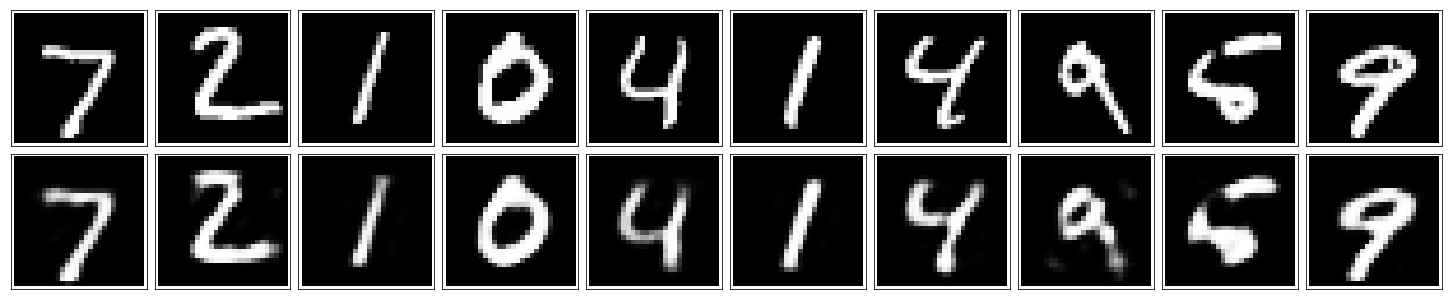

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.